In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_recall_curve, accuracy_score, recall_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, cross_val_predict
from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image  
import time as tm
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, LogisticRegression
import itertools as it

In [2]:
red_train_x = pd.read_csv('red_train_x.csv')
red_train_y = pd.read_csv('red_train_y.csv')
red_test_x = pd.read_csv('red_test_x.csv')
red_test_y = pd.read_csv('red_test_y.csv')
white_train_x = pd.read_csv('white_train_x.csv')
white_train_y = pd.read_csv('white_train_y.csv')
white_test_x = pd.read_csv('white_test_x.csv')
white_test_y = pd.read_csv('white_test_y.csv')

In [7]:
red = pd.read_csv('winequality-red.csv', delimiter = ';')
white = pd.read_csv('winequality-white.csv', delimiter = ';')

Visualizations start below:

In [15]:
value_counts = red['quality'].value_counts()

In [17]:
value_counts_white = white['quality'].value_counts()
value_counts_white

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

ValueError: Invalid RGBA argument: 220

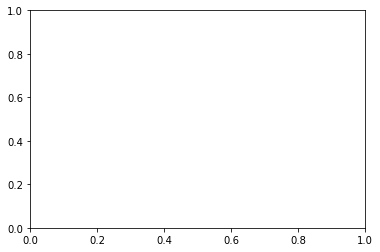

In [24]:
quality = (
3, 4, 5, 6, 7, 8, 9
)
weight_counts = {
    "White": np.array([value_counts_white.iloc[5], value_counts_white.iloc[4], value_counts_white.iloc[1],
                      value_counts_white.iloc[0], value_counts_white.iloc[2], value_counts_white.iloc[3], value_counts_white.iloc[6]]),
        "Red": np.array([value_counts.iloc[5], value_counts.iloc[3], value_counts.iloc[0],
                      value_counts.iloc[1], value_counts.iloc[2], value_counts.iloc[4], 0])
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(quality))

colors = {
    "White": (220/255, 200/255, 200),  # RGB values for cream white
    "Red": (0.54, 0.0, 0.0)       # RGB values for dark red
}

for boolean, weight_count in weight_counts.items():
    p = ax.bar(quality, weight_count, width, label=boolean, bottom=bottom, color=colors[boolean])
    bottom += weight_count

ax.set_title("Count of Median Wine Quality Ratings")
ax.legend(loc = "upper right")

plt.show()